In [1]:
import numpy as np
import pandas as pd

In [2]:
linkedin = pd.read_csv('linkedin_data.csv')
pd.set_option('display.max_columns', None)

In [3]:
linkedin.head(5)

,Unnamed: 0,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,companyUrl,companyUrn,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrLocationCode,mbrTitle,memberUrn,posLocation,posLocationCode,posTitle,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration
0,0,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,NaN,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Portfolio Executive,240345.0,2014-07-01,760.5000,989.9361
1,1,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2014-06-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,"Sydney, Australia","urn:li:fs_region:(au,4910)",Solution Delivery Executive,240346.0,2013-11-01,760.5000,989.9361
2,2,41.0,10047.0,b1c3fd9a-8f21-48f8-8321-d773b1ff3cb7-2.png,CommSec,619.0,http://www.commsec.com.au,urn:li:company:2851,500.0,au,2012-12-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240348.0,2008-08-01,760.5000,747.2308
3,3,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2008-07-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240350.0,2007-02-01,760.5000,989.9361
4,4,30.0,300723.0,0f982557-a907-409e-af20-1feb0e0813cd-2.png,PayPal,22522.0,http://www.paypal.com,urn:li:company:1482,500.0,au,NaN,1.0,951.0,female,RTMZ0-46bTjK4V_MGFDG6i5g0yZmFp5oS0S9liWvpWg.jpg,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)","Senior Marketing Manager, PayPal",urn:li:member:100186032,NaN,NaN,Senior Marketing Manager,229893.0,2017-01-01,395.2857,683.3496


In [4]:
linkedin.columns

Index(['Unnamed: 0', 'ageEstimate', 'companyFollowerCount', 'companyHasLogo',
       'companyName', 'companyStaffCount', 'companyUrl', 'companyUrn',
       'connectionsCount', 'country', 'endDate', 'followable',
       'followersCount', 'genderEstimate', 'hasPicture', 'isPremium',
       'mbrLocation', 'mbrLocationCode', 'mbrTitle', 'memberUrn',
       'posLocation', 'posLocationCode', 'posTitle', 'positionId', 'startDate',
       'avgMemberPosDuration', 'avgCompanyPosDuration'],
      dtype='object')

In [5]:
linkedin.drop({'Unnamed: 0', 'companyUrl', 'companyUrn', 'country', 'followable', 'isPremium', 'mbrLocationCode', 'memberUrn', 'posLocationCode', 'positionId'}, axis = 1, inplace = True)
linkedin.rename(columns = {
    'posLocation': 'jobLocation', 'posTitle': 'jobTitle', 'startDate': 'jobStartDate', 'endDate': 'jobEndDate', 'avgMemberPosDuration': 'avgEmployeeJobDuration', 
    'avgCompanyPosDuration': 'avgCompanyJobDuration', 'mbrLocation': 'employeeLocation', 'mbrTitle': 'employeeTitle'
}, inplace = True)

In [6]:
linkedin.head(5)

,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,connectionsCount,jobEndDate,followersCount,genderEstimate,hasPicture,employeeLocation,employeeTitle,jobLocation,jobTitle,jobStartDate,avgEmployeeJobDuration,avgCompanyJobDuration
0,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,500.0,NaN,506.0,male,NaN,"Sydney Area, Australia",Portfolio Executive at Commonwealth Bank,NaN,Portfolio Executive,2014-07-01,760.5000,989.9361
1,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,500.0,2014-06-01,506.0,male,NaN,"Sydney Area, Australia",Portfolio Executive at Commonwealth Bank,"Sydney, Australia",Solution Delivery Executive,2013-11-01,760.5000,989.9361
2,41.0,10047.0,b1c3fd9a-8f21-48f8-8321-d773b1ff3cb7-2.png,CommSec,619.0,500.0,2012-12-01,506.0,male,NaN,"Sydney Area, Australia",Portfolio Executive at Commonwealth Bank,NaN,Project Manager,2008-08-01,760.5000,747.2308
3,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,500.0,2008-07-01,506.0,male,NaN,"Sydney Area, Australia",Portfolio Executive at Commonwealth Bank,NaN,Project Manager,2007-02-01,760.5000,989.9361
4,30.0,300723.0,0f982557-a907-409e-af20-1feb0e0813cd-2.png,PayPal,22522.0,500.0,NaN,951.0,female,RTMZ0-46bTjK4V_MGFDG6i5g0yZmFp5oS0S9liWvpWg.jpg,"Sydney Area, Australia","Senior Marketing Manager, PayPal",NaN,Senior Marketing Manager,2017-01-01,395.2857,683.3496


In [7]:
linkedin.shape

(39537, 17)

In [8]:
linkedin.duplicated().sum()

46

In [9]:
linkedin.drop_duplicates(inplace = True)
linkedin.duplicated().sum()

0

In [10]:
linkedin['companyFollowerCount'].fillna(0, inplace = True)
linkedin.loc[linkedin['companyHasLogo'].notnull(), 'companyHasLogo'] = 'True'
linkedin['companyHasLogo'].fillna('False', inplace = True)

linkedin.loc[linkedin['hasPicture'].notnull(), 'hasPicture'] = 'True'
linkedin['hasPicture'].fillna('False', inplace = True)
linkedin['companyStaffCount'].fillna(linkedin['companyStaffCount'].median(), inplace = True)
linkedin.dropna(subset = ['companyName', 'jobStartDate', 'avgEmployeeJobDuration', 'avgCompanyJobDuration'], inplace = True)

linkedin = linkedin[
    (linkedin['companyStaffCount'] >= 1) & 
    (linkedin['companyFollowerCount'] >= 1) & 
    (linkedin['avgEmployeeJobDuration'] >= 1) & 
    (linkedin['avgCompanyJobDuration'] >= 1)
]

randomize_gender = np.random.choice(['male', 'female'], size = linkedin['genderEstimate'].isnull().sum(), p = [0.66, 0.34])

undefined_genders = linkedin.loc[(linkedin['genderEstimate'].isnull())]
undefined_genders_list = list(undefined_genders.index)

for undefined_gender_idx in undefined_genders_list:
    current_index = undefined_genders_list.index(undefined_gender_idx)
    linkedin.loc[undefined_gender_idx, 'genderEstimate'] = randomize_gender[current_index]

linkedin.isnull().sum()
# companyFollowerCount remplacer les vlauers nulles par des 0 et supprimer les vlaeurs égales à 0 
# companyHasLogo remplacer les valeurs null par True ou False si y a une image ou pas
# companyName virer les 2 lignes nulles
# companyStaffCount remplacer les nulles par la médiane 50% qui est de 1269 et supprimer les vlaeurs égales à 0
# genderEstimate faire un random de 66 % de H et 34% de F avec numpy
# jobStartDate virer les 16 lignes nulles
# avgEmployeeJobDuration virer les valeurs nulles et virer aussi celle qui sont en dessous ou égale de 0
# avgCompanyJobDuration virer les valeurs nulles et virer aussi celle qui sont en dessous ou égale de 0
# renommage et supression des colonnes
# supression des lignes dupliqués
# Encodage des labels
# Fusion de pluisuers mots en une seul mot

ageEstimate                   0
companyFollowerCount          0
companyHasLogo                0
companyName                   0
companyStaffCount             0
connectionsCount              0
jobEndDate                 7693
followersCount                0
genderEstimate                0
hasPicture                    0
employeeLocation              0
employeeTitle                 0
jobLocation               10500
jobTitle                      0
jobStartDate                  0
avgEmployeeJobDuration        0
avgCompanyJobDuration         0
dtype: int64

In [11]:
linkedin.describe().T

,count,mean,std,min,25%,50%,75%,max
ageEstimate,36936.0,38.432965,9.591872,20.0000,31.0000,38.0000,45.00000,86.0
companyFollowerCount,36936.0,219766.703460,703206.992813,1.0000,1763.0000,15842.0000,137785.00000,7502740.0
companyStaffCount,36936.0,21159.075509,68680.501837,1.0000,122.0000,1461.0000,10284.00000,568533.0
connectionsCount,36936.0,424.535277,122.640538,0.0000,369.0000,500.0000,500.00000,500.0
followersCount,36936.0,1163.985353,2839.970435,0.0000,351.0000,647.0000,1175.00000,161922.0
avgEmployeeJobDuration,36936.0,870.646974,626.447940,28.0000,502.1250,730.4444,1065.00000,15492.5
avgCompanyJobDuration,36936.0,887.720008,307.349545,10.3333,733.2854,899.1538,1037.50485,9497.0


In [12]:
linkedin['genderEstimate'].value_counts()

genderEstimate
male      24665
female    12271
Name: count, dtype: int64

In [13]:
linkedin.head(5)

,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,connectionsCount,jobEndDate,followersCount,genderEstimate,hasPicture,employeeLocation,employeeTitle,jobLocation,jobTitle,jobStartDate,avgEmployeeJobDuration,avgCompanyJobDuration
0,41.0,198859.0,True,Commonwealth Bank,32905.0,500.0,NaN,506.0,male,False,"Sydney Area, Australia",Portfolio Executive at Commonwealth Bank,NaN,Portfolio Executive,2014-07-01,760.5000,989.9361
1,41.0,198859.0,True,Commonwealth Bank,32905.0,500.0,2014-06-01,506.0,male,False,"Sydney Area, Australia",Portfolio Executive at Commonwealth Bank,"Sydney, Australia",Solution Delivery Executive,2013-11-01,760.5000,989.9361
2,41.0,10047.0,True,CommSec,619.0,500.0,2012-12-01,506.0,male,False,"Sydney Area, Australia",Portfolio Executive at Commonwealth Bank,NaN,Project Manager,2008-08-01,760.5000,747.2308
3,41.0,198859.0,True,Commonwealth Bank,32905.0,500.0,2008-07-01,506.0,male,False,"Sydney Area, Australia",Portfolio Executive at Commonwealth Bank,NaN,Project Manager,2007-02-01,760.5000,989.9361
4,30.0,300723.0,True,PayPal,22522.0,500.0,NaN,951.0,female,True,"Sydney Area, Australia","Senior Marketing Manager, PayPal",NaN,Senior Marketing Manager,2017-01-01,395.2857,683.3496


In [14]:
linkedin.columns

Index(['ageEstimate', 'companyFollowerCount', 'companyHasLogo', 'companyName',
       'companyStaffCount', 'connectionsCount', 'jobEndDate', 'followersCount',
       'genderEstimate', 'hasPicture', 'employeeLocation', 'employeeTitle',
       'jobLocation', 'jobTitle', 'jobStartDate', 'avgEmployeeJobDuration',
       'avgCompanyJobDuration'],
      dtype='object')

In [15]:
def get_first_word(employeeLocation):
    if (employeeLocation and len(employeeLocation.split()) > 0):
        return employeeLocation.split()[0].replace(',', '')
    else:
        return np.nan

linkedin['employeeLocation'] = linkedin['employeeLocation'].apply(get_first_word)

In [16]:
linkedin_simple = linkedin.sample(1000)
linkedin_simple.head(5)

,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,connectionsCount,jobEndDate,followersCount,genderEstimate,hasPicture,employeeLocation,employeeTitle,jobLocation,jobTitle,jobStartDate,avgEmployeeJobDuration,avgCompanyJobDuration
7637,38.0,92878.0,True,GHD,8346.0,500.0,NaN,1010.0,female,False,Sydney,"Manager - Maritime & Coastal, Sydney | Acting ...","Sydney, Australia","Manager - Maritime & Coastal, Sydney",2016-10-01,472.1667,1090.6244
36671,26.0,27454.0,True,MYOB,2404.0,500.0,2013-04-01,1212.0,female,True,Melbourne,Training Program Manager at Intuit,"Melbourne, Australia",Training Operations Manager,2009-01-01,816.0000,919.1081
27880,35.0,31432.0,True,Weir Minerals,4551.0,500.0,2012-02-01,1081.0,male,True,Brisbane,Persuasive Persistent Problem Solver,NaN,Business Analyst,2010-10-01,718.4000,1116.8961
13606,28.0,89377.0,True,Fidelity International,6380.0,500.0,2015-06-01,0.0,male,True,Sydney,Consultant | Digital Optimisation & Analytics ...,"Gurgaon, India",Graduate Developer,2014-06-01,266.5000,1013.9804
27849,28.0,2530.0,True,EB Games Australia,566.0,139.0,2011-10-01,140.0,male,False,Sydney,Acting Team Leader - Environmental Health at C...,Tuggerah,Sales Associate,2009-11-01,832.0000,838.1091


In [17]:
# Etape 1 Vectorisation des données textuelles :

import spacy
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Charger le modèle spaCy
nlp = spacy.load('en_core_web_sm')

# Sélectionner les colonnes numériques et textuelles
numeric_cols = ['ageEstimate', 'companyFollowerCount', 'companyStaffCount', 'connectionsCount', 'followersCount', 'avgEmployeeJobDuration', 'avgCompanyJobDuration']
text_cols = ['companyName', 'employeeLocation', 'employeeTitle', 'jobLocation', 'jobTitle']

# Normaliser les colonnes numériques
scaler = MinMaxScaler()
linkedin_simple[numeric_cols] = scaler.fit_transform(linkedin_simple[numeric_cols])

# Preprocess numeric and text columns
for col in numeric_cols:
    linkedin_simple[col] = linkedin_simple[col].astype(np.float64).fillna(0.0)

for col in text_cols:
    linkedin_simple[col] = linkedin_simple[col].astype(str).apply(lambda x: nlp(x).vector)

# Concatenate numeric and text vectors
def concat_vectors(row):
    num_vector = np.array(row[numeric_cols].values, dtype=np.float64)
    text_vector = np.concatenate([row[col] for col in text_cols])
    return np.concatenate((num_vector, text_vector))

linkedin_simple['feature_vector'] = linkedin_simple.apply(concat_vectors, axis=1)

# Convert feature vectors into a numpy matrix
feature_matrix = np.stack(linkedin_simple['feature_vector'].values)

In [18]:
linkedin_simple['feature_vector']

7637     [0.27272727272727276, 0.012379079160290662, 0....
36671    [0.09090909090909088, 0.0036590637099331324, 0...
27880    [0.22727272727272724, 0.004189270078567307, 0....
13606    [0.12121212121212122, 0.011912449573415789, 0....
27849    [0.12121212121212122, 0.00033707689951629664, ...
                               ...                        
26693    [0.37878787878787884, 9.196641386565625e-06, 3...
20390    [0.15151515151515155, 0.000901137571225655, 0....
5285     [0.34848484848484845, 2.9056055395236325e-05, ...
13255    [0.0, 0.00151051502657896, 0.00272631971463347...
12665    [0.19696969696969696, 0.0001726036318203259, 0...
Name: feature_vector, Length: 1000, dtype: object

In [19]:
# Etape 2 Création d'un modèle de correspondance :

from sklearn.metrics.pairwise import cosine_similarity

# Fonction pour recommander des profils basés sur la similarité du cosinus
def recommend_profiles(job_vector, profile_vectors, top_n=5):
    # Calcul de la similarité du cosinus
    similarity_scores = cosine_similarity(job_vector, profile_vectors)

    # Récupération des top_n profils les plus similaires
    top_profiles = np.argsort(similarity_scores[0])[-top_n:]

    return top_profiles

# Use your job vector and profile vectors here
job_vector = feature_matrix[0].reshape(1, -1) # Assuming the first row is a job
profile_vectors = feature_matrix[1:] # Assuming the rest are profiles

# Get recommended profiles
recommended_profiles = recommend_profiles(job_vector, profile_vectors)

print(recommended_profiles)

[301 411 447 703 964]


In [26]:
# Etape 3 Entraînement et évaluation du modèle :
# Utilisation d'un apprentissage non supervisé pour la claissficiation qui est le Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Choix du nombre de clusters. C'est une valeur que vous pourriez vouloir affiner.
n_clusters = 4

# Création et ajustement du modèle K-means
kmeans = KMeans(n_clusters = n_clusters, n_init = 4, random_state = 42)
kmeans.fit(feature_matrix)

# Prédiction des clusters
clusters = kmeans.predict(feature_matrix)

# Évaluation de la qualité du clustering à l'aide du score silhouette
silhouette_avg = silhouette_score(feature_matrix, clusters)
print(f"Pour n_clusters = {n_clusters}, le score silhouette moyen est : {silhouette_avg}")

# Vous pouvez également ajouter les clusters aux données pour une analyse ultérieure
linkedin_simple['cluster'] = clusters
# Le score de silhouette varie de -1 à 1. Bien que le score soit relativement faible, cela peut être dû à la complexité et à la diversité des données.

Pour n_clusters = 4, le score silhouette moyen est : 0.0868610250709605


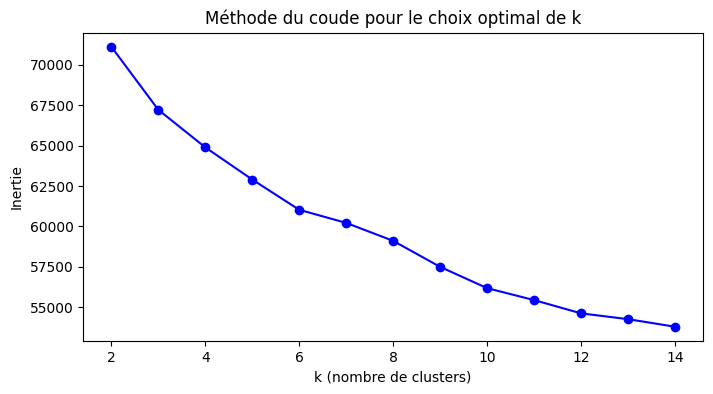

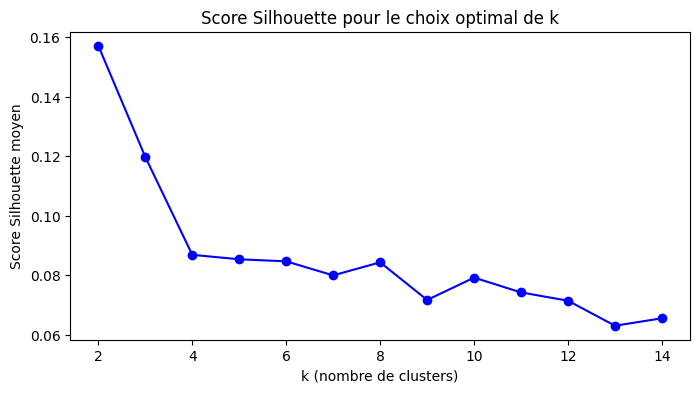

In [27]:
import matplotlib.pyplot as plt

# Liste pour stocker les inerties du cluster
inertias = []

# Liste pour stocker les scores silhouette
silhouette_avgs = []

# Plage de valeurs k à tester
k_values = range(2, 15)

for k in k_values:
    # Créer et ajuster le modèle KMeans
    kmeans = KMeans(n_clusters = k, n_init = 4, random_state = 42)
    kmeans.fit(feature_matrix)
    
    # Calculer l'inertie du cluster
    inertias.append(kmeans.inertia_)
    
    # Calculer le score silhouette moyen
    cluster_labels = kmeans.predict(feature_matrix)
    silhouette_avg = silhouette_score(feature_matrix, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# Tracer l'inertie du cluster
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertias, 'bo-')
plt.xlabel('k (nombre de clusters)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour le choix optimal de k')
plt.show()

# Tracer le score silhouette moyen
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_avgs, 'bo-')
plt.xlabel('k (nombre de clusters)')
plt.ylabel('Score Silhouette moyen')
plt.title('Score Silhouette pour le choix optimal de k')
plt.show()

In [28]:
linkedin_simple['cluster'].head(5)

7637     2
36671    2
27880    0
13606    3
27849    3
Name: cluster, dtype: int32

In [29]:
# Etape 4 Recommandation de profils :

def final_recommend_profiles(job, n_recommendations = 5):
    # Prétraiter les données
    job_df = pd.DataFrame([job])

    # S'assurer que toutes les caractéristiques sont présentes, même si elles sont NaN
    for col in linkedin_simple.columns:
        if col not in job_df.columns:
            job_df[col] = np.nan

    job_df[numeric_cols] = scaler.transform(job_df[numeric_cols])
        
    for col in text_cols:
        job_df[col] = job_df[col].astype(str).apply(lambda x: nlp(x).vector)

    job_df['feature_vector'] = job_df.apply(concat_vectors, axis = 1)
    job_vector = np.stack(job_df['feature_vector'].values)

    # Prévoir le cluster pour le nouvel emploi
    job_cluster = kmeans.predict(job_vector)

    # Recommander les profils du même cluster
    profiles_cluster = np.where(kmeans.labels_ == job_cluster)[0]
    recommended_profiles = np.random.choice(profiles_cluster, size = n_recommendations)

    return linkedin_simple.iloc[recommended_profiles]

# Considérez ceci comme un exemple d'un nouvel emploi
new_job = {
    'ageEstimate': 32, 'companyFollowerCount': 1000, 'companyStaffCount': 1200, 'connectionsCount': 500, 'followersCount': 300, 
    'avgEmployeeJobDuration': 3, 'avgCompanyJobDuration': 3, 'companyName': 'Atlassian', 'employeeLocation': 'Sydney', 'employeeTitle': 'Back End Developer', 
    'jobLocation': 'Sydney', 'jobTitle': 'Back End Developer'
}

final_recommended_profiles = final_recommend_profiles(new_job)

In [30]:
final_recommended_profiles.head()

,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,connectionsCount,jobEndDate,followersCount,genderEstimate,hasPicture,employeeLocation,employeeTitle,jobLocation,jobTitle,jobStartDate,avgEmployeeJobDuration,avgCompanyJobDuration,feature_vector,cluster
23513,0.287879,0.000148,True,"[-1.3210697, -0.9928484, -0.64306676, 0.612964...",0.000248,1.000000,NaN,0.000000,male,True,"[-1.6116425, -0.6216563, -0.3105213, 0.0211110...","[-0.2956126, -0.7123877, -0.30677688, 0.277623...","[-1.9286263, -0.043430835, -0.6115068, 0.76591...","[-1.0388625, -1.3585202, 0.21562624, 0.6227914...",2017-12-01,0.056912,0.142478,"[0.2878787878787879, 0.0001478126854739316, 0....",3
38326,0.393939,0.006230,True,"[0.100351594, -0.7965207, -0.55982834, 0.04563...",0.003331,1.000000,NaN,0.135771,female,True,"[-1.9630952, -0.20188063, -0.3416989, 0.110543...","[-0.6371311, -0.73477864, -0.5072273, 0.288923...","[-1.6142223, -0.1709103, 0.15573634, 0.6292456...","[-1.1482713, -1.1231236, -0.63039064, 0.776944...",2013-06-01,0.110175,0.300454,"[0.393939393939394, 0.006229724904464889, 0.00...",3
26180,0.196970,0.024136,True,"[0.2065414, -0.5471275, -0.5869715, 0.30744374...",0.018880,0.148676,NaN,0.003100,female,True,"[-1.9630952, -0.20188063, -0.3416989, 0.110543...","[0.08040532, -0.5069308, -0.48198572, -0.27803...","[-0.80041844, -1.4174526, -0.13192129, 0.55470...","[-0.96084803, -0.9814191, -0.3770073, -0.04055...",2018-10-01,0.035959,0.306675,"[0.19696969696969696, 0.024136385392054822, 0....",3
21031,0.136364,0.007560,True,"[0.21993864, -0.63319373, -0.4585127, -0.18872...",0.006360,1.000000,2014-02-01,0.039699,male,True,"[-1.6116425, -0.6216563, -0.3105213, 0.0211110...","[-0.5581086, -0.9827517, -0.057126284, 0.05207...","[-1.3708086, -0.14059679, -0.22527534, 0.15515...","[-0.3589187, -0.7201262, -1.0576441, 0.7789110...",2011-01-01,0.038375,0.343664,"[0.13636363636363635, 0.00756017235838805, 0.0...",3
38781,0.151515,0.002004,True,"[-1.1900183, -0.6762232, -0.1419139, 0.4461910...",0.002480,1.000000,2013-06-01,0.043518,female,True,"[-1.9630952, -0.20188063, -0.3416989, 0.110543...","[-0.1844019, -0.3723872, -0.2772865, 0.2347332...","[-2.2353702, 0.6580633, -0.29701248, 0.5928929...","[-0.39888215, -0.29736015, 0.008220434, 0.2732...",2011-07-01,0.024786,0.329485,"[0.15151515151515155, 0.0020036682603513196, 0...",3


In [31]:
linkedin.to_csv('./streamlit/data/updated_linkedin_data.csv', index = False)
linkedin_simple.to_csv('./streamlit/data/updated_linkedin_simple_data.csv', index = False)